In [1]:
import pandas as pd
import seaborn as sns
import numpy as np


In [2]:
url = "https://raw.githubusercontent.com/shivang98/Social-Network-ads-Boost/master/Social_Network_Ads.csv"
# s = requests.get(url)
df = pd.read_csv(url)

In [3]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
dummies = pd.get_dummies(data = df["Gender"])

In [5]:
df = pd.concat([df, dummies], axis = 1)

In [6]:
df.drop("Gender", axis=1, inplace=True)

In [7]:
df

,User ID,Age,EstimatedSalary,Purchased,Female,Male
0,15624510,19,19000,0,0,1
1,15810944,35,20000,0,0,1
2,15668575,26,43000,0,1,0
3,15603246,27,57000,0,1,0
4,15804002,19,76000,0,0,1
...,...,...,...,...,...,...
395,15691863,46,41000,1,1,0
396,15706071,51,23000,1,0,1
397,15654296,50,20000,1,1,0
398,15755018,36,33000,0,0,1


<AxesSubplot:ylabel='Age'>

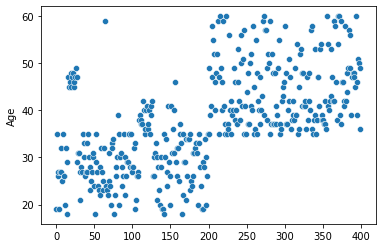

In [8]:
sns.scatterplot(data=df["Age"])

In [50]:
X = df[["Age", "EstimatedSalary", "Male"]]

In [51]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-1.78179743, -1.49004624,  1.02020406],
       [-0.25358736, -1.46068138,  1.02020406],
       [-1.11320552, -0.78528968, -0.98019606],
       ...,
       [ 1.17910958, -1.46068138, -0.98019606],
       [-0.15807423, -1.07893824,  1.02020406],
       [ 1.08359645, -0.99084367, -0.98019606]])

In [53]:
X = pd.DataFrame(X, columns=["Age", "EstimatedSalary", "Male"])
X

,Age,EstimatedSalary,Male
0,-1.781797,-1.490046,1.020204
1,-0.253587,-1.460681,1.020204
2,-1.113206,-0.785290,-0.980196
3,-1.017692,-0.374182,-0.980196
4,-1.781797,0.183751,1.020204
...,...,...,...
395,0.797057,-0.844019,-0.980196
396,1.274623,-1.372587,1.020204
397,1.179110,-1.460681,-0.980196
398,-0.158074,-1.078938,1.020204


In [54]:
Y = df["Purchased"]

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state = 0)

In [56]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(X_train, Y_train)

LogisticRegression()

In [57]:
lr.score(X_test, Y_test)

0.9125

In [58]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, lr.predict(X_test))

0.9125

In [59]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=Y_test, y_pred=lr.predict(X_test))
cm

array([[56,  2],
       [ 5, 17]], dtype=int64)

In [60]:
y_pred = lr.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1], dtype=int64)